In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

### Task 1: (30% of credit)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.

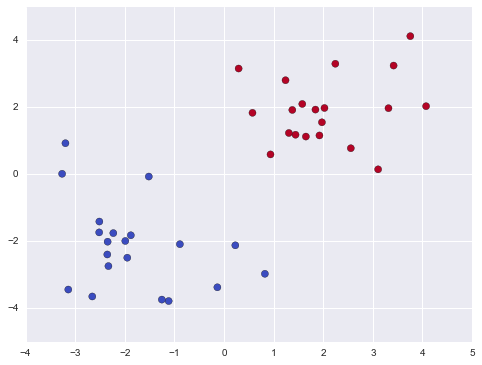

In [2]:
#Data
data1=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

[ 0.22627536 -2.11810965]
[ 0.93564585  0.5969359 ]
separating line [ 2.86558248  2.74549134  2.62540021  2.50530907  2.38521793  2.26512679
  2.14503565  2.02494451  1.90485337  1.78476223  1.66467109  1.54457996
  1.42448882  1.30439768  1.18430654  1.0642154   0.94412426  0.82403312
  0.70394198  0.58385085  0.46375971  0.34366857  0.22357743  0.10348629
 -0.01660485 -0.13669599 -0.25678713 -0.37687827 -0.4969694  -0.61706054
 -0.73715168 -0.85724282 -0.97733396 -1.0974251  -1.21751624 -1.33760738
 -1.45769852 -1.57778965 -1.69788079 -1.81797193 -1.93806307 -2.05815421
 -2.17824535 -2.29833649 -2.41842763 -2.53851877 -2.6586099  -2.77870104
 -2.89879218 -3.01888332]


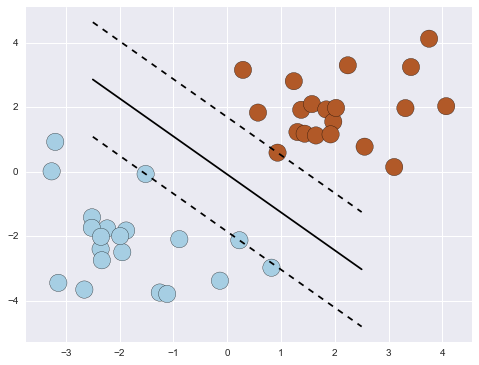

In [5]:
from sklearn import svm
# fit the model
clf = svm.SVC(kernel='linear',C=100000)  # as we use linear svm we specify a linear kernel (see below what does it mean)
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
########################################################################
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that go through the
# support vectors
b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])
print b
b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])
print b

# plot the line, the points, and the nearest vectors to the plane
plt.plot(x1, x2, 'k-')
print 'separating line',x2
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y, cmap=plt.cm.Paired,s=300)

plt.axis('tight')
plt.show()

### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.


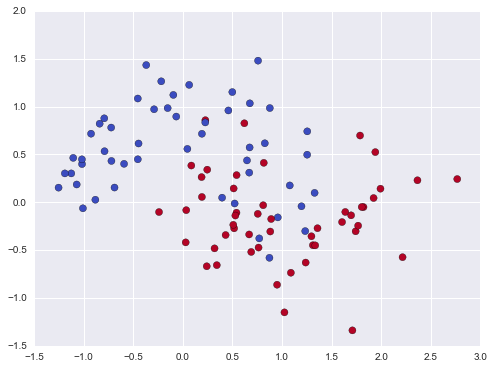

In [6]:
#Data
data2=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

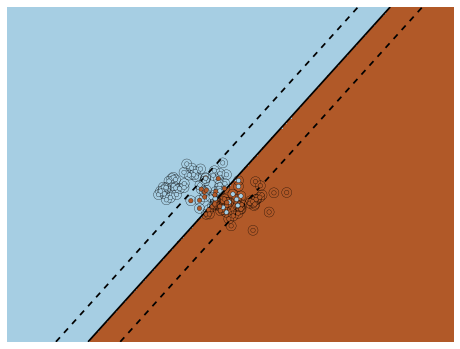

we successfully predict the 90 percent of data


In [7]:
# Obviousely, we cannot separate this two clusters with a single line.
# let's use a soft margin classifier model over the entire data with C=1.

clf = svm.SVC(kernel='linear',C=0.01) #you can try other C and find the model not too sensitive to it - it seems the only reasonable split is too obvious to depend on it 

clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -6
x_max = 8
y_min = -6
y_max = 8

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS errors: (Just use clf.predict to compare the predicted labels with current labels)
print "we successfully predict the {} percent of data".format(100-abs(clf.predict(X)-Y).sum()*50/len(Y))

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

C:\Users\priya\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


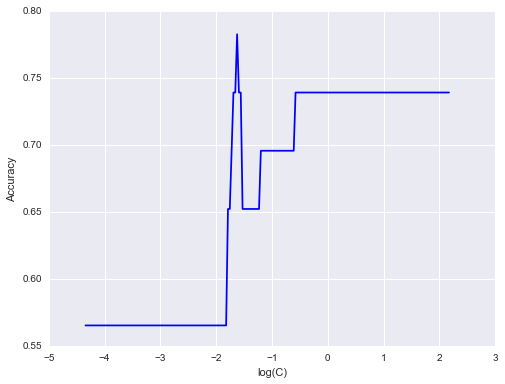

The optimal C we found is:0.0236659353222 and the corresponding accuracy is:0.782608695652


In [9]:
#Let's do cross validation for choosing C since we see the result is not
#very good.
import pylab
import math
# Let's devide the training set into training set and validation set.
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=70)
#When C is very small, which means we want to tolerate more mistakes. If C is very big, this
#means we hardly tolerate any mistakes. So, we cannot make a very big C if our data is not
#really seperable. Let's however choose from a broad range of reasonable options
C = np.linspace(-10,10,300)
C=[math.exp(i) for i in np.linspace(-10,5,200)]
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
    OS_validation.append(right)
temp=pd.DataFrame([C,OS_validation]).T
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # Let's take the middle one for safty
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

C=[math.log(y,10) for y in C] #for a better graph
pylab.plot(C,OS_validation,'b',)
pylab.legend(loc='upper right')
pylab.ylabel('Accuracy')
pylab.xlabel('log(C)')
pylab.show()

print("The optimal C we found is:{} and the corresponding accuracy is:{}".format(C_opt,temp.iloc[:,1].max())) # I choose the biggest one.


#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.

In [10]:
clf = svm.SVC(kernel='linear',C=C_opt)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data by using linear model".format((correct)*100)

we successfully(OS) predict the 78.7878787879 percent of data by using linear model


### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


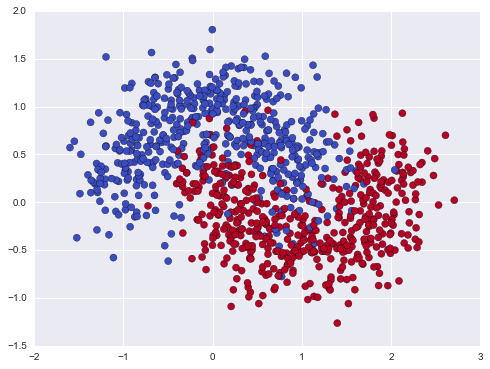

In [11]:
#Data 
data3=pd.read_csv('https://serv.cusp.nyu.edu/classes/ML_2016_Spring/session6/HW/task3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

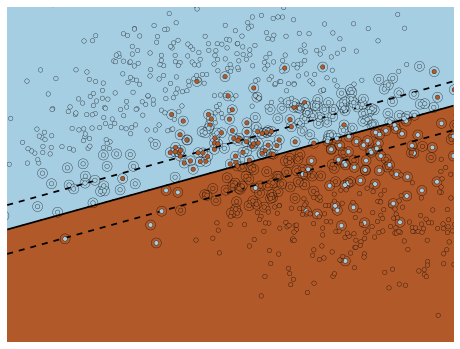

we successfully(IS) predict the 84.5 percent of data


In [12]:
# Let's have a quick look of linear SVM
clf = svm.SVC(kernel='linear',C=1) 
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane

plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', zorder=10) # plot support vectors with small circle

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -1.5
x_max = 1.5
y_min = -1.5
y_max = 1.5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()
# Let's calculate the IS mistakes: (Just use clf.predic to compare the predicted labels with current labels)
print "we successfully(IS) predict the {} percent of data".format(1.0*(clf.predict(X)==Y).sum()/len(Y)*100)

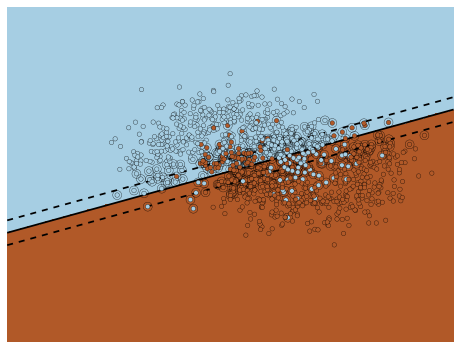

we successfully predict(IS) the 84 percent of data
we successfully(OS) predict the 84.2424242424 percent of data


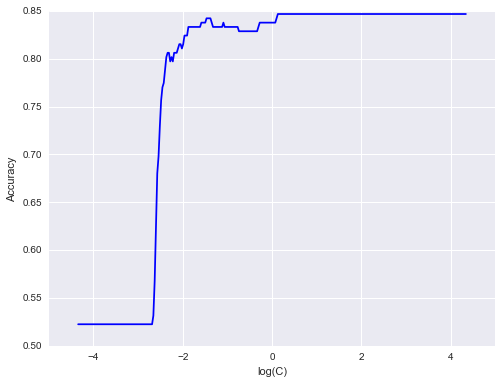

The optimal C we found is:178.385419634 and the corresponding accuracy is:0.846846846847


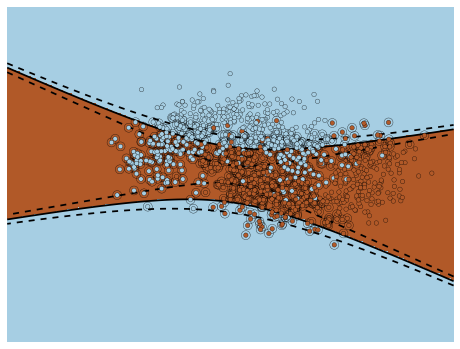

we successfully predict(IS) the 73 percent of data
we successfully(OS) predict the 62.7272727273 percent of data


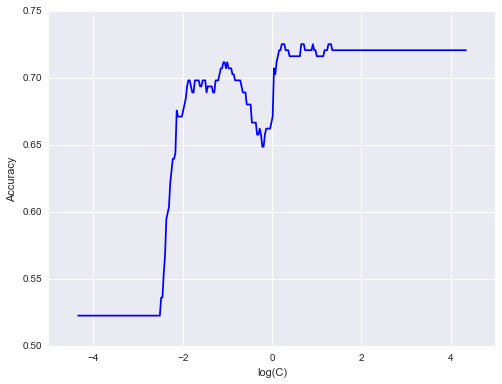

The optimal C we found is:5.14896635427 and the corresponding accuracy is:0.725225225225


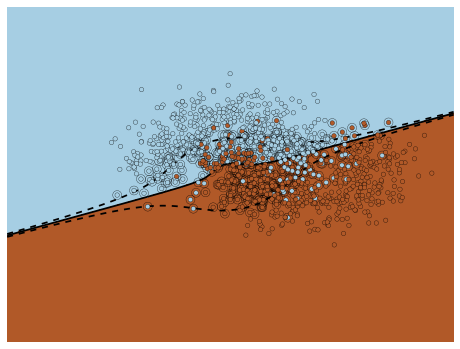

we successfully predict(IS) the 85 percent of data
we successfully(OS) predict the 79.0909090909 percent of data


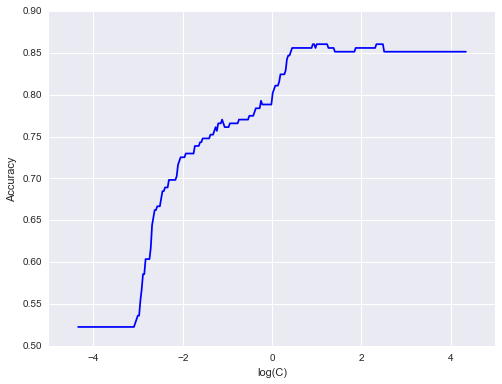

The optimal C we found is:15.0147056924 and the corresponding accuracy is:0.86036036036


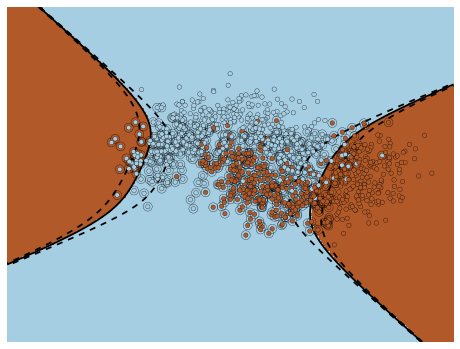

we successfully predict(IS) the 67 percent of data
we successfully(OS) predict the 64.5454545455 percent of data


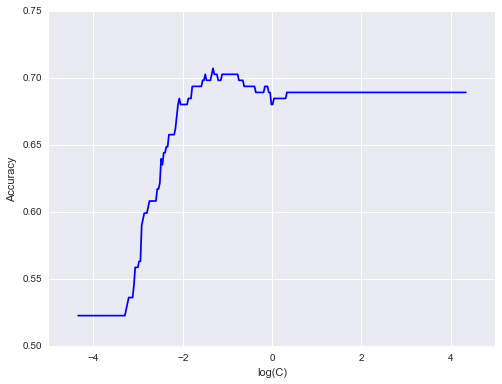

The optimal C we found is:0.0476687962951 and the corresponding accuracy is:0.707207207207


In [13]:
for i in range(1,5):
    degree = i
    # Now let's use polynomial kernal with degree 2 (think how distinctive the data above might be in terms of..see on the right....x1 x2 )
    clf = svm.SVC(kernel='poly',degree=degree) 
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane

    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)

    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.show()
    print "we successfully predict(IS) the {} percent of data".format((Y==clf.predict(X)).sum()*100/len(Y))
    from sklearn.cross_validation import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=999) #Use random_state to fix samples

    clf = svm.SVC(kernel='poly',degree=degree) 
    clf.fit(X_train, Y_train)

    correct=1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)

    print "we successfully(OS) predict the {} percent of data".format((correct)*100)
    #Let's do cross validation for choosing C since we see the result is not
    #very good.
    import pylab
    import math
    # Let's devide the training set into training set and validation set.
    X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
        X_train, Y_train, test_size=0.33, random_state=70)
    #When C is very small, which means we want to tolerate more mistakes. If C is very big, this
    #means we hardly tolerate any mistakes. So, we cannot make a very big C if our data is not
    #really seperable. Let's however choose from a broad range of reasonable options
    C = np.linspace(-10,10,300)
    C=[math.exp(i) for i in C]
    OS_validation=[]
    for c in C:
        clf = svm.SVC(kernel='poly',C=c,degree=degree) 
        clf.fit(X_train_1, Y_train_1)
        right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
        OS_validation.append(right)
    temp=pd.DataFrame([C,OS_validation]).T
    ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # Let's take the middle one for safty
    C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[ind,0]

    C=[math.log(y,10) for y in C] #for a better graph
    pylab.plot(C,OS_validation,'b',)
    pylab.legend(loc='upper right')
    pylab.ylabel('Accuracy')
    pylab.xlabel('log(C)')
    pylab.show()

    print("The optimal C we found is:{} and the corresponding accuracy is:{}".format(C_opt,temp.iloc[:,1].max())) # I choose the biggest one.



In [14]:
clf = svm.SVC(kernel='poly', degree=3,C=15.0147056924)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print "we successfully(OS) predict the {} percent of data".format((correct)*100)

we successfully(OS) predict the 88.1818181818 percent of data
